# Data Exploration
### Plot data characteristics and visually examine the images. 

### Setup drive

Run the following cell to mount your Drive onto Colab. Go to the given URL and once you login and copy and paste the authorization code, you should see "drive" pop up in the files tab on the left.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Click the little triangle next to "drive" and navigate to the "AI4All Chest X-Ray Project" folder. Hover over the "data" folder and click the 3 dots that appear on the right. Select "copy path" and replace the string for path_to_dataset with the path to your folder.

In [ ]:
cd "/content/drive/My Drive/AI4All Chest X-Ray Project"

/content/drive/.shortcut-targets-by-id/1iJKbtzLay6C-5OfpVHhbe1nQeNGyhFWO/AI4All Chest X-Ray Project


### Import necessary libraries
skimage (scikit-image) is a package designed specifically for preprocessing images

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import seaborn as sns
from skimage import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Setup paths

Define paths and load metadata

In [ ]:
path_to_dataset = os.path.join('data')
path_to_images = os.path.join(path_to_dataset, 'images')

metadata = pd.read_csv(os.path.join(path_to_dataset, 'metadata_train.csv'))

### Examine metadata

The metadata provides useful information about the dataset such as data sources and other background factors.

Print out metadata and take a look at each of the columns!

In [ ]:
metadata

,patientid,sex,age,view,finding,dataset,folder,filename
0,2,M,65.0,PA,COVID-19,Cohen,covid,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,2,M,65.0,PA,COVID-19,Cohen,covid,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,2,M,65.0,PA,COVID-19,Cohen,covid,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,2,M,65.0,PA,COVID-19,Cohen,covid,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,4,F,52.0,PA,COVID-19,Cohen,covid,nejmc2001573_f1a.jpeg
...,...,...,...,...,...,...,...,...
785,patient36016,M,51.0,AP,No Finding,Stanford,nofinding,patient36016_study1_view1_frontal.jpg
786,patient34551,M,77.0,AP,No Finding,Stanford,nofinding,patient34551_study1_view1_frontal.jpg
787,patient20075,M,22.0,PA,No Finding,Stanford,nofinding,patient20075_study1_view1_frontal.jpg
788,patient36195,F,49.0,AP,No Finding,Stanford,nofinding,patient36195_study12_view1_frontal.jpg


**Check out the dataframe**

What information is provided for each image? What values are in each column?

Are there any patterns with regard to empty values in the dataset?

Write your thoughts here: 

In [ ]:
# Experiment with .isna(), .isna().any(), and .isna().any(axis = 0)
print(metadata.isna())
print(metadata.isna().any())
print(metadata.isna().any(axis = 0))


     patientid    sex    age   view  finding  dataset  folder  filename
0        False  False  False  False    False    False   False     False
1        False  False  False  False    False    False   False     False
2        False  False  False  False    False    False   False     False
3        False  False  False  False    False    False   False     False
4        False  False  False  False    False    False   False     False
..         ...    ...    ...    ...      ...      ...     ...       ...
785      False  False  False  False    False    False   False     False
786      False  False  False  False    False    False   False     False
787      False  False  False  False    False    False   False     False
788      False  False  False  False    False    False   False     False
789      False  False  False  False    False    False   False     False

[790 rows x 8 columns]
patientid    False
sex           True
age           True
view         False
finding      False
dataset      Fals

Some data sets where sex and age are missing.

### Explore data characteristics

Characteristics of the data may affect the model evaluation in unexpected ways. By examining properties of the data, we can anticipate and account for biases in the data. For example, if all the Covid-19 images came from adults while all the No Finding images came from children, our model may  pick up signals related to age rather than to the disease. Such a model would not generalize well when applied to predict real-world data.

Note: Feel free to add cells and experiment with the data on your own! Maybe you'll find patterns we didn't even think of!

**Making plots from dataframes with Seaborn**

Seaborn (`sns`) is a nice library for visualizing plots from dataframes. In the code below, we provide the dataframe `data=metadata` to the plotting function `sns.countplot`. We also specify which column from the dataframe to plot on the x-axis `x='finding'` and which column to use for color `hue='dataset'`. 

Other functions in seaborn use similar syntax. You can [check out examples here](http://seaborn.pydata.org/examples/index.html) for other plots to try!



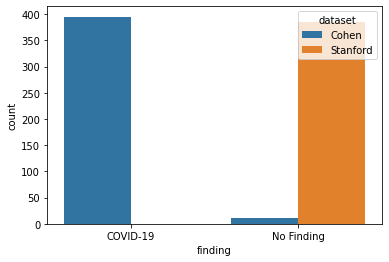

In [ ]:
# plots number of covid vs no finding images in the two datasets
sns.countplot(x='finding', hue='dataset', data=metadata)

There are some images in the Cohen data set(14) that have no findings.

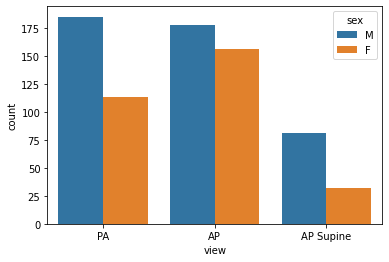

In [ ]:
# EXERCISE: try changing the x and hue to explore other factors!
sns.countplot(x='view', hue='sex', data=metadata)


There are significantly more males that were tested(bias?).

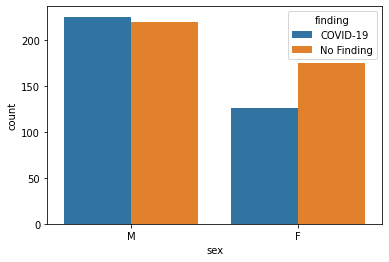

In [ ]:
sns.countplot(x='sex', hue='finding', data=metadata)


There were significantly more men that were diagnosed(bias?).

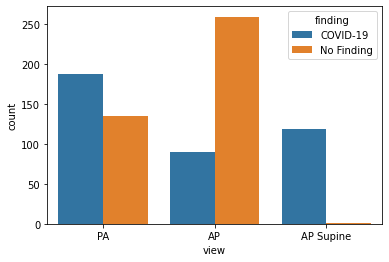

In [ ]:
sns.countplot(x='view', hue='finding', data=metadata)

There were significantly more people with AP view x-rays who were not diagnosed with COVID-19. More patients who did a PA x-ray were diagnosed with COVID-19.

**Examine how the data is distributed according to variables in the dataframe** 

Try different plots to examine these variables (age, sex, etc).

Write your observations here: 

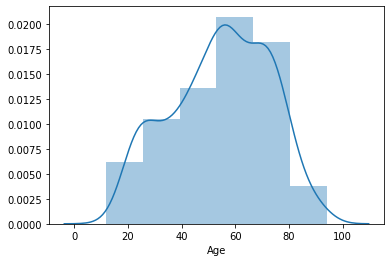

In [ ]:
# EXERCISE: plot other variables, try different kinds of plots such as sns.distplot
sns.distplot(metadata.age, bins = 6, hist = True, vertical = False, axlabel = "Age", label = "Age vs. COVID-19")

What are some other important attributes to consider, including those not provided in the metadata?

**More plotting functions**

We can make more detailed visualization that splits the data across multiple plots based on attributes. Here we use the [FacetGrid function](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to plot the distribution of `sex` in subsets based on `finding` and `dataset` values.

Feel free to play around with this code to make additional plots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


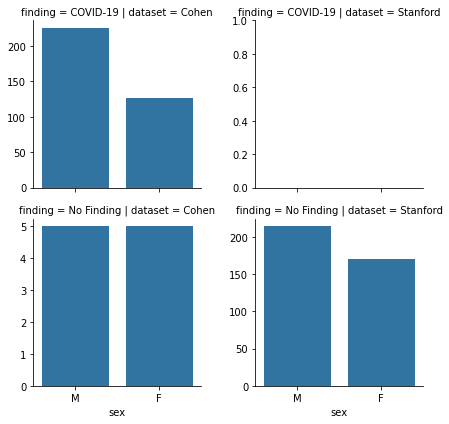

In [ ]:
g = sns.FacetGrid(metadata, col='dataset', row='finding', sharey=False)
p = g.map(sns.countplot, 'sex').add_legend()

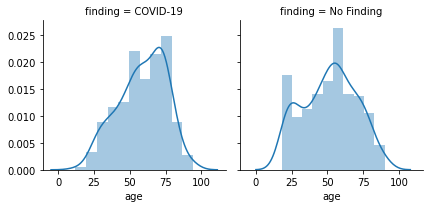

In [ ]:
g = sns.FacetGrid(metadata, col='finding')
p = g.map(sns.distplot, 'age').add_legend()

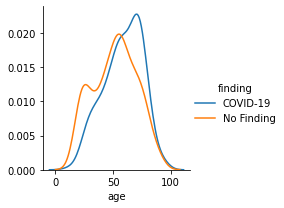

In [ ]:
g = sns.FacetGrid(metadata, hue='finding')
p = g.map(sns.distplot, 'age', hist = False).add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


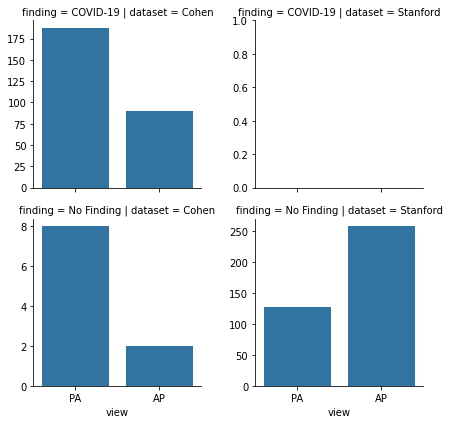

In [ ]:
g = sns.FacetGrid(metadata, col='dataset', row='finding', sharey=False)
p = g.map(sns.countplot, 'view').add_legend()

More older patients were diagnosed with COVID-19(as proven).

### Explore the images

Machines are smart but not that smart. If human vision cannot distinguish between two sets of images, it may also be difficult for our models to detect any differences. Our knowledge of the data can also help guide model design for better accuracy.

In [ ]:
def sample_images(df, n=5):
    '''Randomly samples n images (rows) from  dataframe and reads the images
    
    Args:
      df: dataframe
      n: number of images 
    
    Returns: list of images
    '''
    
    files = df.apply(lambda x: os.path.join(path_to_images, x.folder, x.filename), 
                     axis=1)
    files = files.tolist()
    
    subset = random.sample(files, n)
    
    ims = [io.imread(p) for p in subset]

    return ims

In [ ]:
def plot_grid(ims, n=5):
    '''Plots images in a grid (nxn)
    
    Args:
      ims: list of images
      n: grid size (nxn)
    
    Returns: None (plots images)
    '''

    # plots images as greyscale
    plt.gray()
    
    fig, axes = plt.subplots(1,n, figsize=(15,15))
    axes = axes.ravel()

    for im, ax in zip(ims, axes):
        ax.imshow(im)

    plt.show()

**Do you see any differences between Covid and healthy images?**

Write your thoughts here:


<Figure size 432x288 with 0 Axes>

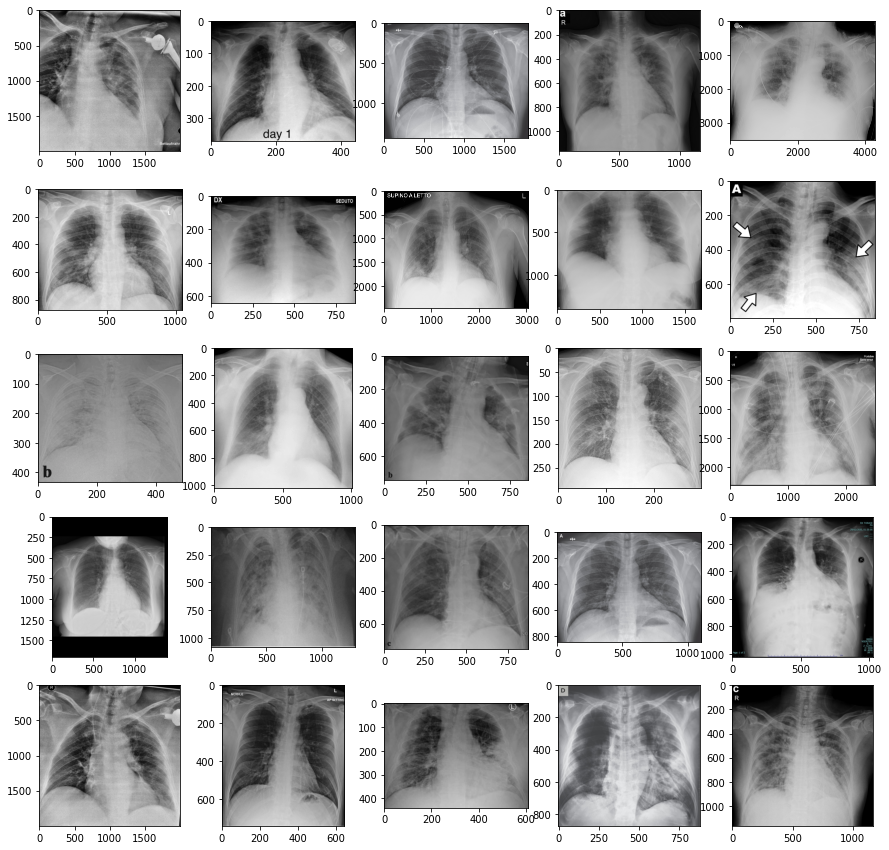

In [ ]:
# EXERCISE: Use the above helper functions to plot 25 randomly selected 
# images of patients with Covid
covid_metadata = metadata[metadata.finding == 'COVID-19']
plot_grid(sample_images(covid_metadata, 25))

<Figure size 432x288 with 0 Axes>

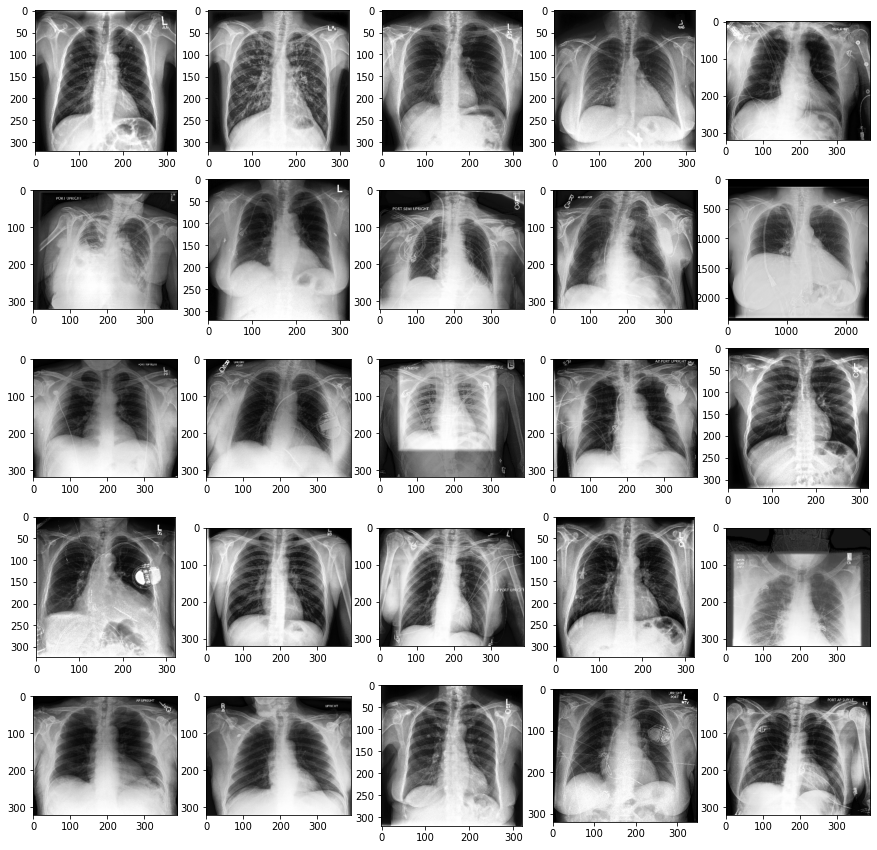

In [ ]:
# EXERCISE: Use the above helper functions to plot 25 randomly selected 
# images of healthy patients
healthy_metadata = metadata[metadata.finding == 'No Finding']
plot_grid(sample_images(healthy_metadata, 25))

The spacing between the lungs differ(more for COVID patients). The ribs are more visible for patients without COVID-19.

**Any other image properties to note?**

How do the three views differ?

Are there any superficial differences in the image that could impact the training?

<Figure size 432x288 with 0 Axes>

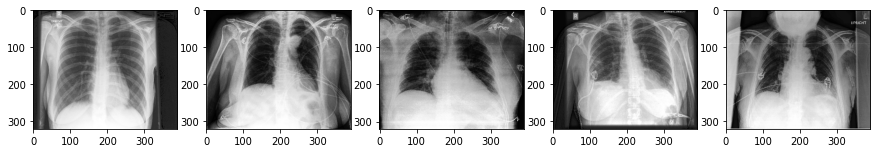

<Figure size 432x288 with 0 Axes>

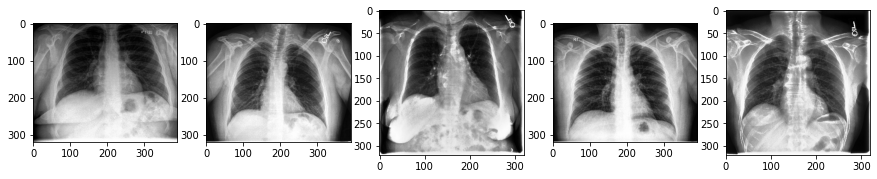

<Figure size 432x288 with 0 Axes>

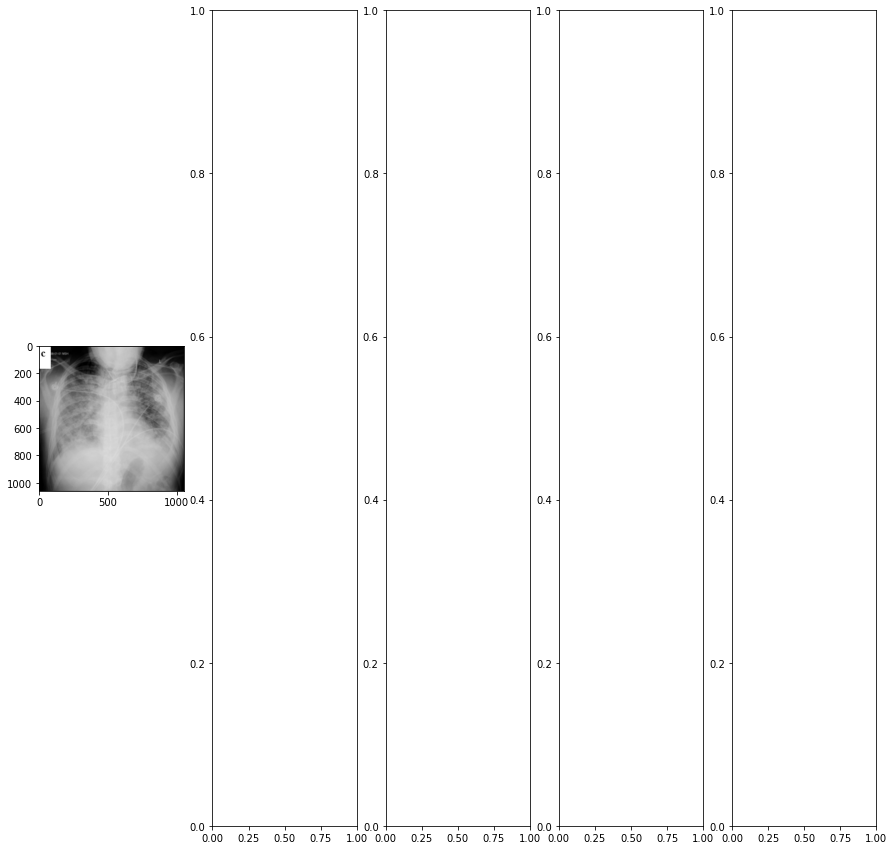

In [ ]:
# EXERCISE: Compare images from different views by subsetting the 
# dataframe and using the same helper functions above
AP_metadata = metadata[(metadata.view == 'AP') & (metadata.finding == 'No Finding')]
plot_grid(sample_images(AP_metadata, 5))

PA_metadata = metadata[(metadata.view == 'PA') & (metadata.finding == 'No Finding')]
plot_grid(sample_images(PA_metadata, 5))

AP_Supine_metadata = metadata[(metadata.view == 'AP Supine') & (metadata.finding == 'No Finding')]
plot_grid(sample_images(AP_Supine_metadata, 1))

For the non-COVID patients, the PA images seem to have clearer spines and do not have much bright white. Lot of markings on the non-COVID images.

PA seems clearer

<Figure size 432x288 with 0 Axes>

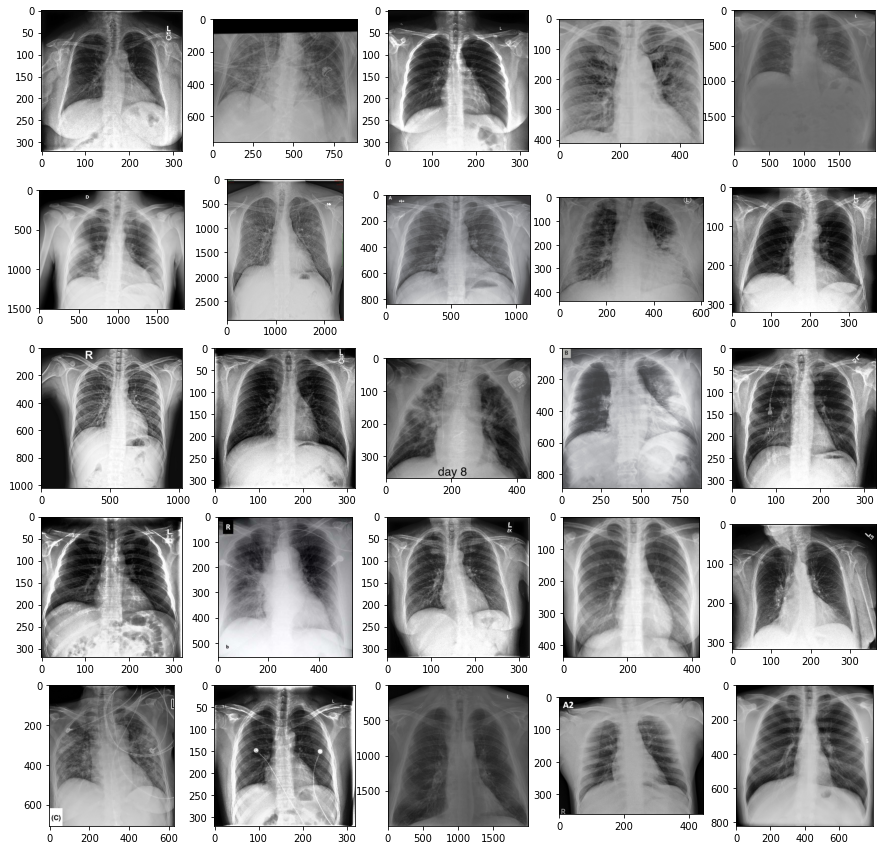

In [ ]:
PA_metadata = metadata[metadata.view == 'PA']
plot_grid(sample_images(PA_metadata, 25))

<Figure size 432x288 with 0 Axes>

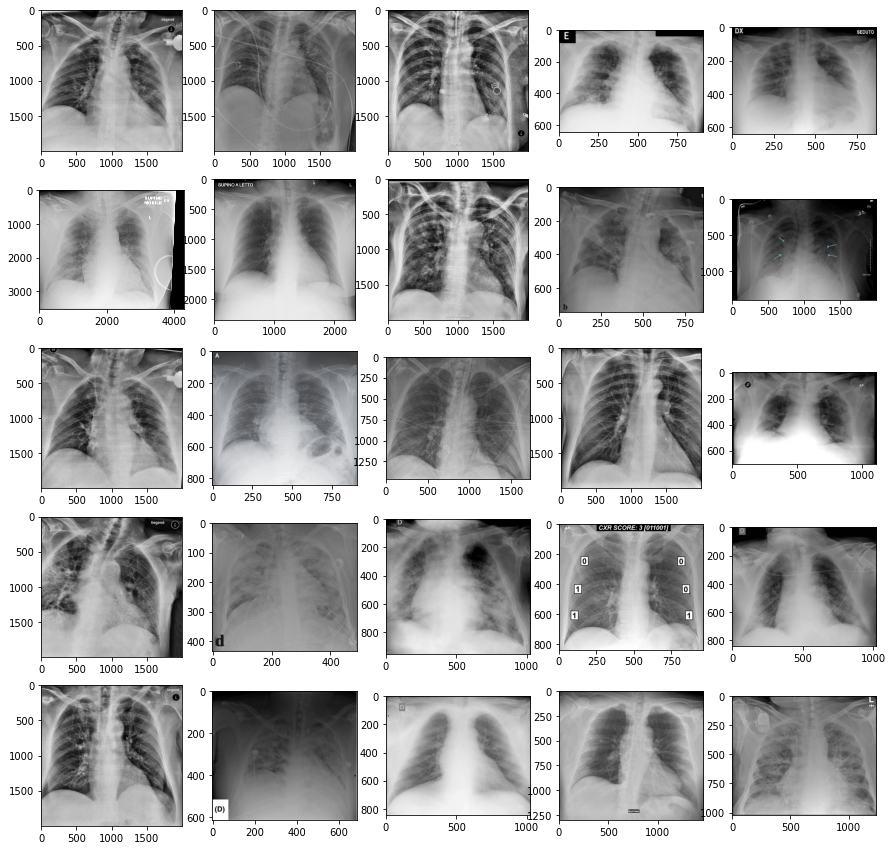

In [ ]:
AP_Supine_metadata = metadata[metadata.view == 'AP Supine']
plot_grid(sample_images(AP_Supine_metadata, 25))

### Class balancing

Another important factor to consider when examining your data is the portion of data in each class (label). In this dataset, I have provided an equal number of Covid-19 and No Finding images (395 images each). However, there are actually 16985 No Finding images available in the Stanford dataset! 

What would happen if we used all the No Finding images with only 395 Covid-19 images?

In [ ]:
num_covid = 395
num_norm = 16985

print(f'Percent Covid in entire dataset: {num_covid/num_norm *100 :0.2f}%')

Percent Covid in entire dataset: 2.33%


Your model will not be able to learn from such a small amount of COVID-19 cases. All or most of the images would be classified as no finding. Differences between classes can fool you if one class is present more often(overfittig, being careful about how you are evaluating your model).

### Check for multiple images for the same patient

Here, we will be checking whether there are multiple images from the same patient in our dataset.

**Why might it be bad to include images of the same patient both in the train and test set?**

Write your thoughts here: 

In [ ]:
multiple_images = metadata[metadata.duplicated(['patientid'])]

# EXERCISE: fill in the following variables!

# the total number of images that have duplicate patient id's
num_multi = len(multiple_images)

sum = 0
for i in multiple_images.iterrows():
  sum += 1
print(sum)
#to iterate over data frame, use iterrows to go through rows rather than columns(default)

# the  number of images that have duplicate patient id's in the Cohen dataset
num_multi_cohen = len(multiple_images[metadata.dataset == 'Cohen'])

# the  number of images that have duplicate patient id's in the Stanford dataset
num_multi_stanford = len(multiple_images[metadata.dataset == 'Stanford'])

print(f'Number of images for the same patients: {num_multi}')
print(f'- In Cohen dataset: {num_multi_cohen}')
print(f'- In Stanford dataset: {num_multi_stanford}')

150
Number of images for the same patients: 150
- In Cohen dataset: 149
- In Stanford dataset: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Multiple images will cause the machine to memorize these patterns rather than learning properly from the images. The features will nto be learned properly. Only the data will be learnt rather than the features.

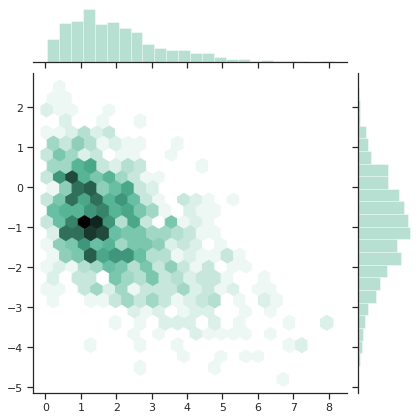

In [ ]:
#pretty picture/graph
import numpy as np
import seaborn as sns
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

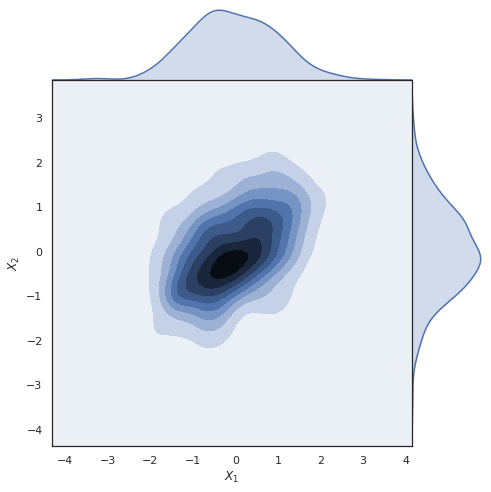

In [ ]:
#good graph to try for this data set
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")

# Generate a random correlated bivariate dataset
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
x1, x2 = rs.multivariate_normal(mean, cov, 500).T
x1 = pd.Series(x1, name="$X_1$")
x2 = pd.Series(x2, name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

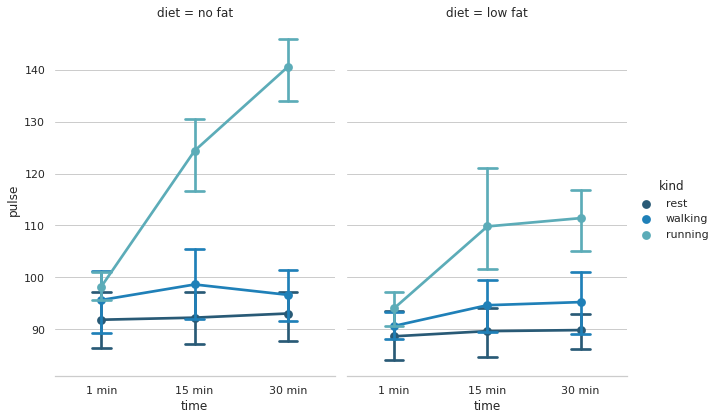

In [ ]:
#good graph to try for this data set
sns.set(style="whitegrid")

# Load the example exercise dataset
df = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="time", y="pulse", hue="kind", col="diet",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)

### Discussion

**What are your initial thoughts on the data? Anything to keep in mind when training and evaluating the model?**

Write your thoughts here: 

Look for distinct differences between COVID-19 and no findings so that we can find something to look for to differentiate these images. Investigate images based on other variables so that we can find new differences between features. Predict male or female? Predicting COVID-19 or no findings, what images or not being classified properly? Is there a pattern between them?